# Upper Confidence Bound (UCB)

## Importing the libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [22]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [23]:
import math
N = 1000
d = 10    #number of adds
ads_selected = []
numbers_of_selection = [0]*d #initialise list of size 6-0's
sum_of_rewards = [0]*d
total_reward = 0
for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selection[i] != 0:
            average_of_rewards = sum_of_rewards[i] / numbers_of_selection[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selection[i])
            upper_bound = average_of_rewards + delta_i
        else:
            upper_bound = 1e400
        if upper_bound>max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad) 
    numbers_of_selection[ad] += 1  
    reward = dataset.values[n,ad]
    sum_of_rewards[ad] += dataset.values[n,ad]


## Visualising the results

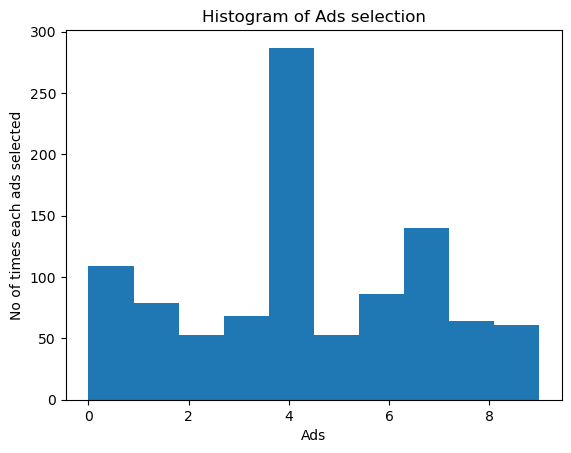

In [24]:
plt.hist(ads_selected)
plt.title('Histogram of Ads selection')
plt.xlabel('Ads')
plt.ylabel('No of times each ads selected')
plt.show()